In [4]:
num_friends = [100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of People')

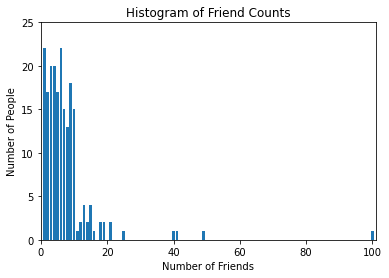

In [6]:
friend_counts = Counter(num_friends)
xs = range(101)                         # The largest value is 100
ys = [friend_counts[x] for x in xs]     # The height is just the number of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of Friends")
plt.ylabel("Number of People")
# plt.show()

In [7]:
num_points = len(num_friends)               # 204

In [8]:
assert num_points == 204

In [9]:
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

In [10]:
assert largest_value == 100
assert smallest_value == 1

In [11]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

In [12]:
assert smallest_value == 1

In [13]:
assert second_smallest_value == 1

In [14]:
assert second_largest_value == 49

In [15]:
from typing import List

In [16]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [17]:
mean(num_friends)   # 7.333333

7.333333333333333

In [18]:
assert 7.3333 < mean(num_friends) < 7.3334

In [19]:
# The Underscores Indicate That These Are Private Functions, as They're
# Intended to Be Called by the Median Function but Not by Other People
# Using the Statistics Library

def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

In [20]:
def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [22]:
def median(v: List[float]) -> float:
    """Finds the middle-most value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [23]:
assert median([1, 10, 2, 9, 5]) == 5

In [24]:
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [25]:
assert median(num_friends) == 6

In [26]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the p-th percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [27]:
assert quantile(num_friends, 0.10) == 1

In [28]:
assert quantile(num_friends, 0.25) == 3

In [29]:
assert quantile(num_friends, 0.75) == 9

In [30]:
assert quantile(num_friends, 0.90) == 13

In [31]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [32]:
assert set(mode(num_friends)) == {1, 6}

In [33]:
# "range" Already Means Something In Python, so We'll Use a Different Name

def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [34]:
assert data_range(num_friends) == 99

In [43]:
from scratch.linear_algebra import sum_of_squares

In [44]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [45]:
def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [46]:
assert 81.54 < variance(num_friends) < 81.55

In [47]:
import math

In [48]:
def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

In [49]:
assert 9.02 < standard_deviation(num_friends) < 9.04

In [50]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75th percentile and the 25th percentile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [51]:
assert interquartile_range(num_friends) == 6

In [52]:
daily_minutes = [1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12, 46.62, 35.57, 32.98, 35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21, 36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94, 30.5, 33.8, 24.23, 21.4, 27.94, 32.24, 40.57, 25.07, 19.42, 22.39, 18.42, 46.96, 23.72, 26.41, 26.97, 36.76, 40.32, 35.02, 29.47, 30.2, 31, 38.11, 38.18, 36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31, 30.17, 25.53, 19.85, 35.37, 44.6, 17.23, 13.47, 26.33, 35.02, 32.09, 24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51, 15.23, 39.72, 40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62, 35.59, 39.43, 14.18, 35.24, 40.13, 41.82, 35.45, 36.07, 43.67, 24.61, 20.9, 21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53, 13.82, 33.2, 25, 33.1, 36.65, 18.63, 14.87, 22.2, 36.81, 25.53, 24.62, 26.25, 18.21, 28.08, 19.42, 29.79, 32.8, 35.99, 28.32, 27.79, 35.88, 29.06, 36.28, 14.1, 36.63, 37.49, 26.9, 18.58, 38.48, 24.48, 18.95, 33.55, 14.24, 29.04, 32.51, 25.63, 22.22, 19, 32.73, 15.16, 13.9, 27.2, 32.01, 29.27, 33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48, 9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16, 30.7, 31.22, 34.65, 13.13, 27.51, 33.2, 31.57, 14.1, 33.42, 17.44, 10.12, 24.42, 9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48, 8.38, 27.81, 32.35, 23.84]

In [53]:
daily_hours = [dm / 60 for dm in daily_minutes]

In [54]:
from scratch.linear_algebra import dot

In [55]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "The xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [56]:
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43

In [57]:
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [58]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much the xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # If there is no variation, then the correlation is zero

In [59]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25

In [60]:
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

In [61]:
outlier = num_friends.index(100)    # Index of the outlier

In [62]:
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

In [63]:
daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [64]:
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [65]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58

In [66]:
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58